In [66]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
#read in the datatset
df = pd.read_csv('energydata_complete.csv')

In [68]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [69]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


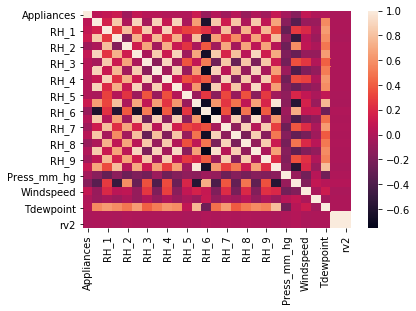

In [100]:
sns.heatmap(df.corr())

In [70]:
#dropping date and lights column
df.drop(columns = ['date', 'lights'], inplace=True)

In [71]:
#Using MinMaxScaler to normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
Appliances_target = normalized_df['Appliances']

In [72]:
#splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_df, Appliances_target, 
                                                    test_size=0.3, random_state=42 )

In [73]:
#fitting multiple linear regression in the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
#predicting the test set result
y_pred = regressor.predict(X_test)
y_pred

array([0.02803738, 0.07476636, 0.03738318, ..., 0.03738318, 0.09345794,
       0.03738318])

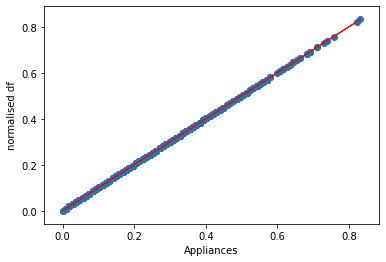

In [84]:
plt.scatter(y_test, y_pred)
fig = plt.plot(y_test,y_pred, lw=1, c='red', label = 'regression line')
plt.xlabel('Appliances')
plt.ylabel('normalised df')
plt.show()

In [85]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
round(mae, 3)

0.0

In [87]:
#R2 SCORE
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
round(r2_score, 3)

1.0

In [88]:
#RSS
rss = np.sum(np.square(y_test - y_pred))
round(rss, 3)

0.0

In [89]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [90]:
#feature selection and Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [92]:
 #comparing the weights of regularisation
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df
    
regressor = get_weights_df(regressor, X_train, 'regressor')
ridge_weights_df = get_weights_df(ridge_reg, X_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_Weight')
    
final_weights = pd.merge(regressor, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [93]:
final_weights

,Features,regressor,Ridge_Weight,Lasso_Weight
0,T_out,-3.717848e-16,-0.001137,0.000000
1,T2,-3.637868e-16,-0.000879,0.000000
2,RH_7,-2.512939e-16,-0.000210,-0.000000
3,RH_6,-2.487889e-16,0.000159,-0.000000
4,Press_mm_hg,-7.350382e-17,0.000030,-0.000000
5,Visibility,-6.153210e-17,0.000055,0.000000
6,T9,-5.044838e-17,-0.000855,0.000000
7,RH_5,-4.981741e-17,0.000073,0.000000
8,RH_9,-4.827122e-17,-0.000189,-0.000000
9,RH_8,-3.967095e-17,-0.000710,-0.000000


In [118]:
x=df[['T2']]

In [119]:
y=df[['T6']]

In [120]:
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
from sklearn.metrics import r2_score
r2_score = r2_score(x, y)
round(r2_score, 2)

-35.39

In [126]:
import numpy as np
rss = np.sum(np.square(x - y))
round(rss, 2)

T2    0.0
T6    0.0
dtype: float64

In [127]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(x, y))
round(rmse, 3)

13.229

In [131]:
#code to perform regression itself
x = sm.add_constant(y)
results = sm.OLS(y,x).fit()
#to get the statistical summary of the sample dataset
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     T6   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.659e+33
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        02:43:26   Log-Likelihood:             6.1092e+05
No. Observations:               19735   AIC:                        -1.222e+06
Df Residuals:                   19733   BIC:                        -1.222e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.837e-16   1.02e-16     -5.746      0.000   -7.83e-16   -3.85e-16
T6             1.0000   1.02e-17   9.83e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     1036.963   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1206.592
Skew:                          -0.591   Prob(JB):                    9.82e-263
Kurtosis:                       3.266   Cond. No.                         16.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x, y)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [135]:
#feature selection and Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x, y)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)